In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (4).zip")

In [83]:
print(df.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Text(0.5, 1.0, 'Histogram of Temperature')

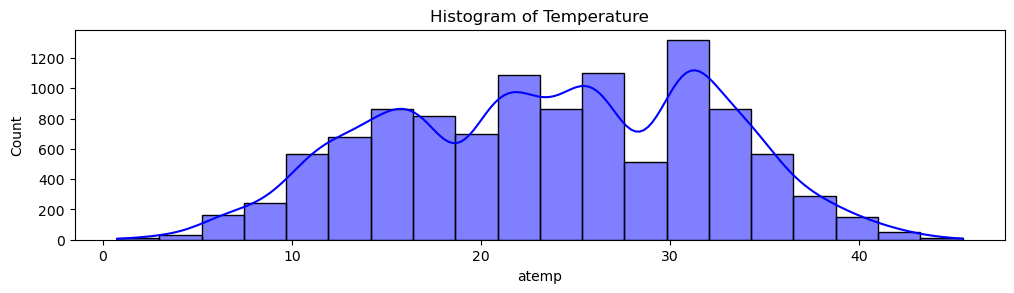

In [85]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(df['atemp'], bins=20, kde=True, color='blue')
plt.title('Histogram of Temperature')



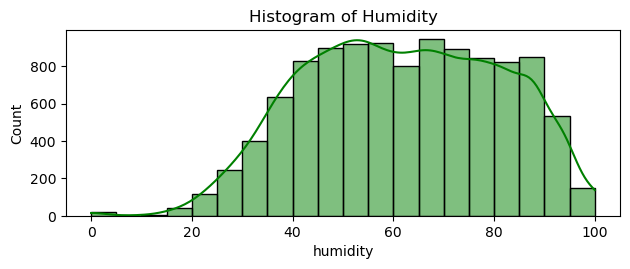

In [86]:
plt.subplot(2, 1, 2)
sns.histplot(df['humidity'], bins=20, kde=True, color='green')
plt.title('Histogram of Humidity')
plt.tight_layout()
plt.show()



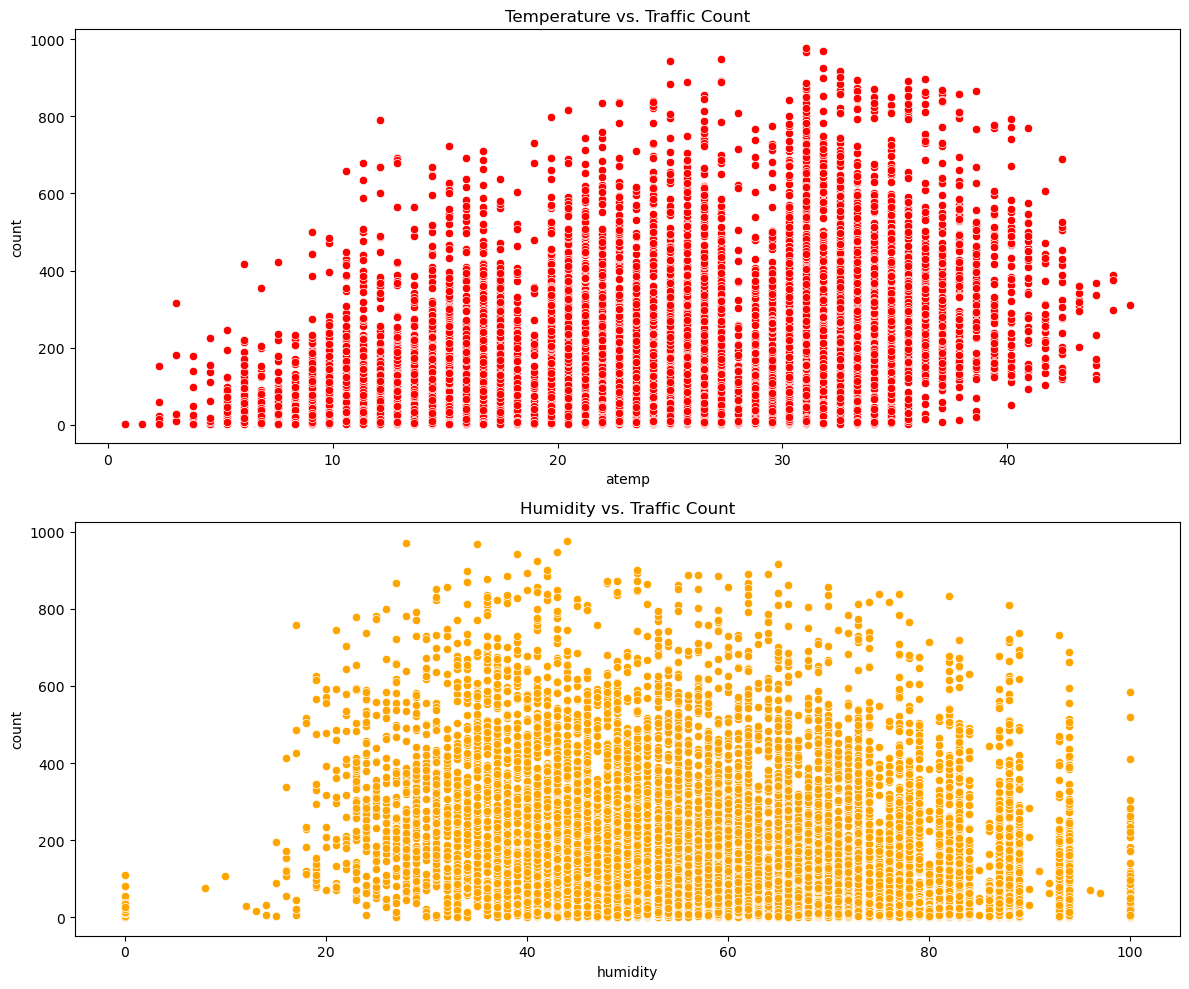

In [87]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(x=df['atemp'], y=df['count'], color='red')
plt.title('Temperature vs. Traffic Count')

plt.subplot(2, 1, 2)
sns.scatterplot(x=df['humidity'], y=df['count'], color='orange')
plt.title('Humidity vs. Traffic Count')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7324\2314236315.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_traffic = df.resample('H')['count'].sum()


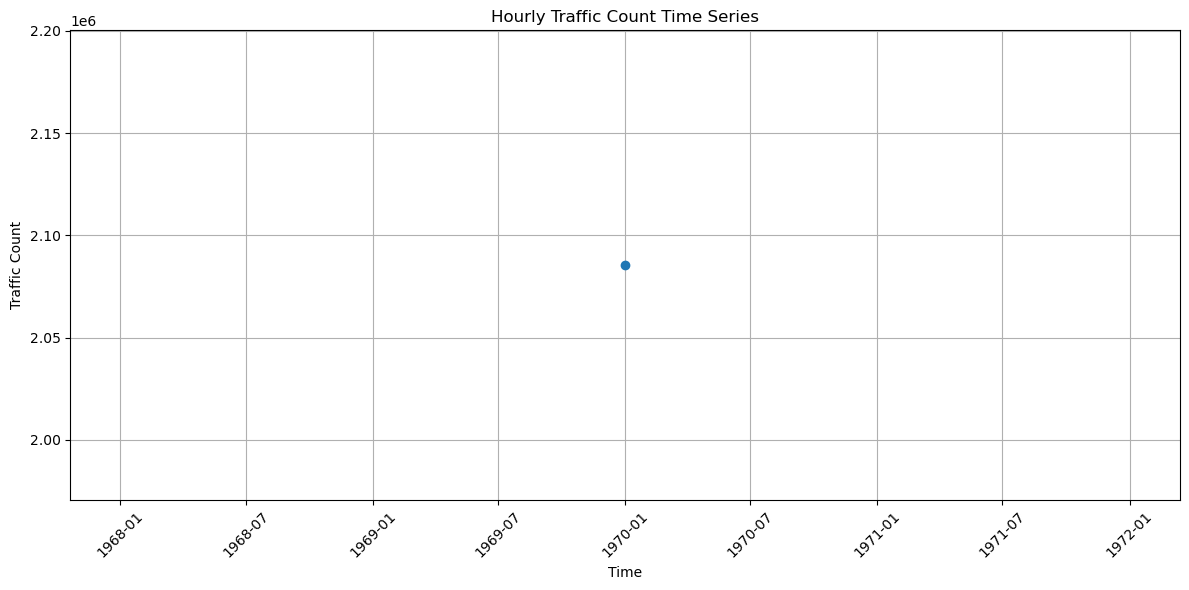

In [88]:
plt.figure(figsize=(12, 6))

# Assuming 'Timestamp' is your time series index
df.index = pd.to_datetime(df.index)
hourly_traffic = df.resample('H')['count'].sum()
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linestyle='-')
plt.title('Hourly Traffic Count Time Series')
plt.xlabel('Time')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame with relevant columns
# Selecting relevant features
X = df[['weather', 'atemp', 'humidity']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [90]:
# Choose the number of clusters (can be optimized using techniques like elbow method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels




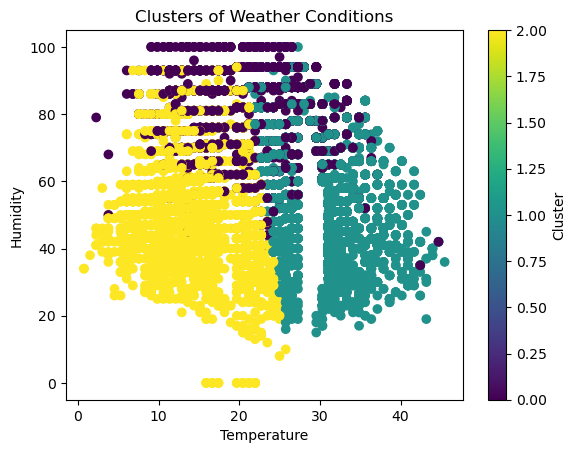

In [91]:
# Visualize the clusters (example for 2D data)
plt.scatter(df['atemp'], df['humidity'], c=df['cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Clusters of Weather Conditions')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7324\136528895.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2020-01-01', periods=100, freq='M')


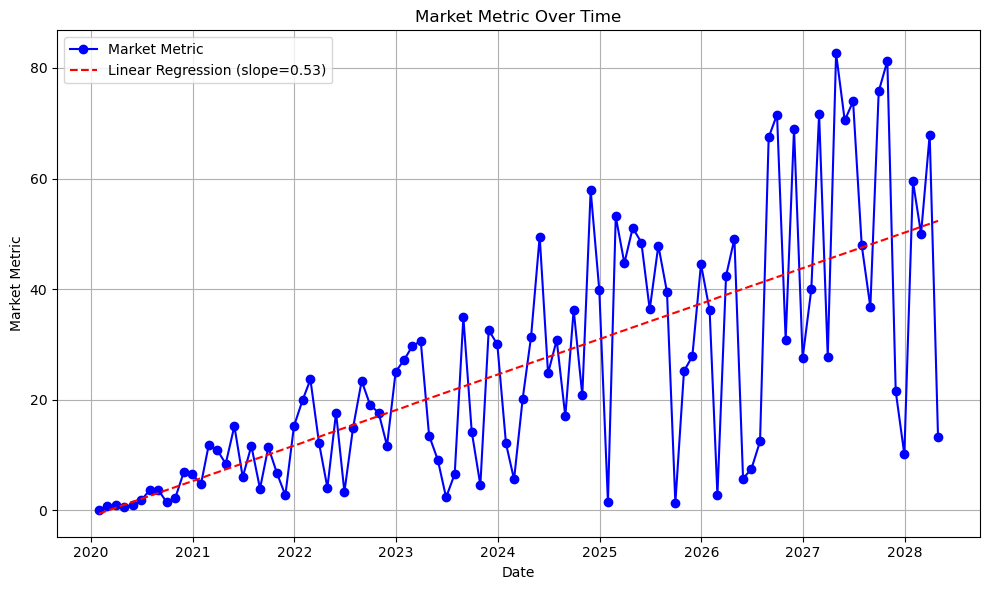

Slope of linear regression: 0.5349905235659367


In [92]:
from sklearn.linear_model import LinearRegression

# Example data (replace with your actual market data)
dates = pd.date_range('2020-01-01', periods=100, freq='M')
market_metric = np.random.rand(100) * np.arange(100)  # Example of a growing trend

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Market Metric': market_metric})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Market Metric'], marker='o', linestyle='-', color='b', label='Market Metric')

# Perform linear regression
X = np.arange(len(df)).reshape(-1, 1)  # Use integer time index as X
y = df['Market Metric'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0][0]
intercept = model.intercept_

# Plot the linear regression line
plt.plot(df['Date'], model.predict(X), linestyle='--', color='r', label=f'Linear Regression (slope={slope:.2f})')

plt.title('Market Metric Over Time')
plt.xlabel('Date')
plt.ylabel('Market Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the slope of the linear regression
print(f"Slope of linear regression: {slope}")

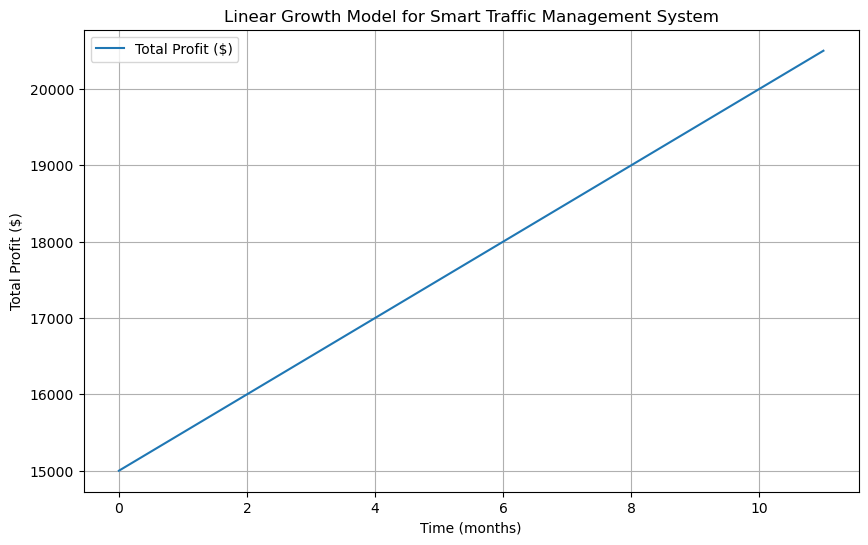

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
m_linear = 10  # Pricing of service ($ per unit)
c_linear = 5000  # Fixed costs ($ per month)

# Time range (months)
t_linear = np.arange(0, 12, 1)  # Assuming a year (12 months) for demonstration

# Total sales (vehicles monitored)
x_linear = 1000 + 50 * t_linear

# Total profit calculation
y_linear = m_linear * x_linear + c_linear

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_linear, y_linear, label='Total Profit ($)')
plt.title('Linear Growth Model for Smart Traffic Management System')
plt.xlabel('Time (months)')
plt.ylabel('Total Profit ($)')
plt.grid(True)
plt.legend()
plt.show()
